In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from find_walking_frames import find_walking_data
from pre_process import pull_acceleration

In [2]:
directory = 'data/'

subject_num = '5'

sub_5_walks = find_walking_data(subject_num, directory)

sub_5_walks.keys()

dict_keys(['05_13', '05_12', '05_14', '05_19', '05_11', '05_08', '05_06', '05_20', '05_07', '05_05', '05_09', '05_10'])

In [3]:
df = sub_5_walks['05_05'][0]

In [4]:
df.head()

,acc_rf_x,acc_rf_y,acc_rf_z,gyro_rf_x,gyro_rf_y,gyro_rf_z,acc_rs_x,acc_rs_y,acc_rs_z,gyro_rs_x,...,gyro_ls_z,acc_lt_x,acc_lt_y,acc_lt_z,gyro_lt_x,gyro_lt_y,gyro_lt_z,EMG_r,EMG_l,act
247,-11052,-3264,12192,100,-132,-178,-16196,2288,-1504,1541,...,-6,-16200,-120,-1608,-64,-59,43,129,149,1
248,-10992,-3240,12168,128,-64,-216,-15996,2728,-1632,995,...,-10,-16440,-16,-1536,-45,-126,47,129,147,1
249,-11048,-3392,12120,126,-137,-204,-15976,2332,-1464,950,...,-7,-16584,-168,-1656,-71,-250,51,129,146,1
250,-11056,-3164,12140,134,-94,-228,-16140,2052,-1432,1825,...,-10,-16560,152,-1320,-66,-352,66,129,139,1
251,-11228,-3144,12036,11,-147,-333,-15956,2300,-1580,3680,...,-18,-16840,288,-824,-26,-395,86,129,142,1


In [5]:
df.columns

Index(['acc_rf_x', 'acc_rf_y', 'acc_rf_z', 'gyro_rf_x', 'gyro_rf_y',
       'gyro_rf_z', 'acc_rs_x', 'acc_rs_y', 'acc_rs_z', 'gyro_rs_x',
       'gyro_rs_y', 'gyro_rs_z', 'acc_rt_x', 'acc_rt_y', 'acc_rt_z',
       'gyro_rt_x', 'gyro_rt_y', 'gyro_rt_z', 'acc_lf_x', 'acc_lf_y',
       'acc_lf_z', 'gyro_lf_x', 'gyro_lf_y', 'gyro_lf_z', 'acc_ls_x',
       'acc_ls_y', 'acc_ls_z', 'gyro_ls_x', 'gyro_ls_y', 'gyro_ls_z',
       'acc_lt_x', 'acc_lt_y', 'acc_lt_z', 'gyro_lt_x', 'gyro_lt_y',
       'gyro_lt_z', 'EMG_r', 'EMG_l', 'act'],
      dtype='object')

In [10]:
from datetime import timedelta

def conv_acceleration(num):
    return 2*num/32768


df_accel = pd.DataFrame(None)

for column in df.columns:
    if 'acc' in column:
        df_accel[column] = df[column].apply(conv_acceleration)

delta = timedelta(seconds = 1/56.35)


df_accel['time'] = (df.index - df.index[0]) * delta

df_accel.set_index('time', inplace = True)

df_accel.head()

,acc_rf_x,acc_rf_y,acc_rf_z,acc_rs_x,acc_rs_y,acc_rs_z,acc_rt_x,acc_rt_y,acc_rt_z,acc_lf_x,acc_lf_y,acc_lf_z,acc_ls_x,acc_ls_y,acc_ls_z,acc_lt_x,acc_lt_y,acc_lt_z
time,,,,,,,,,,,,,,,,,,
0 days 00:00:00,-0.674561,-0.199219,0.744141,-0.988525,0.139648,-0.091797,-0.981934,0.044434,-0.106445,-0.583496,0.491943,0.645508,-0.970215,0.261230,-0.136719,-0.988770,-0.007324,-0.098145
0 days 00:00:00.017746,-0.670898,-0.197754,0.742676,-0.976318,0.166504,-0.099609,-0.975586,0.058594,-0.115723,-0.586914,0.495117,0.652832,-0.981445,0.256348,-0.146484,-1.003418,-0.000977,-0.093750
0 days 00:00:00.035492,-0.674316,-0.207031,0.739746,-0.975098,0.142334,-0.089355,-0.974121,0.040527,-0.113770,-0.586914,0.488525,0.649170,-0.964355,0.250000,-0.142090,-1.012207,-0.010254,-0.101074
0 days 00:00:00.053238,-0.674805,-0.193115,0.740967,-0.985107,0.125244,-0.087402,-0.991699,0.035645,-0.122559,-0.585938,0.491699,0.645752,-0.969727,0.256348,-0.138672,-1.010742,0.009277,-0.080566
0 days 00:00:00.070984,-0.685303,-0.191895,0.734619,-0.973877,0.140381,-0.096436,-0.978027,0.042480,-0.129395,-0.587646,0.492920,0.647705,-0.956055,0.262695,-0.123535,-1.027832,0.017578,-0.050293


The acceleration data can be converted to gravitational accelleration by taking $2x/32768$.

In [7]:
df_accel_rt = df_accel[['acc_rt_x', 'acc_rt_y', 'acc_rt_z']]

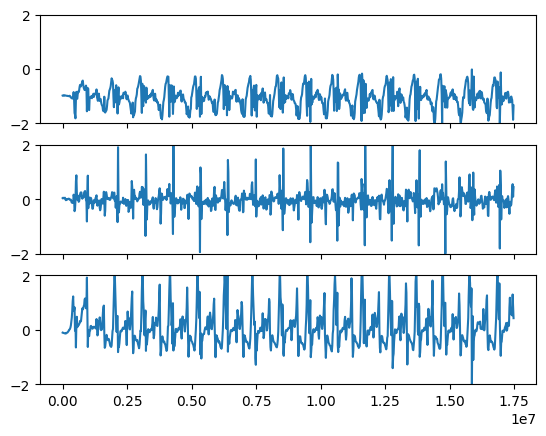

In [8]:
fig, axes = plt.subplots(3,1, sharex = True)
for ax,column in zip(axes, df_accel_rt.columns):
    ax.plot(df_accel_rt.index, df_accel_rt[column])
    ax.set_ylim(-2,2)

In [9]:
1/56.35

0.01774622892635315